# Reseach Question

* What is the frequency of domestic violence incidents involving firearms in different areas or neighborhoods? Analyze the occurrence of firearm-related domestic violence incidents in each area to identify high-crime zones.

## Importing Packages

In [137]:
# Importing necessary libraries:

# numpy is a library for numerical operations, often used for numerical arrays & matrices.
import numpy as np

# pandas is a library for data manipulation and analysis, offering data structures like DataFrames.
import pandas as pd

# matplotlib is a plotting library to produce static, animated, and interactive visualizations.
import matplotlib.pyplot as plt

# seaborn is a statistical data visualization library based on matplotlib.
import seaborn as sns

In [138]:
# Load the dataset into a pandas DataFrame
df = pd.read_csv('Domestic_Violence_Calls_from_2020_to_Present.csv')

# Set pandas option to display all rows when viewing the DataFrame
pd.set_option("display.max_rows", None)

# Display the first 5 rows of the DataFrame for a quick overview
df.head()

,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,211916029,11/26/2021 12:00:00 AM,11/30/2020 12:00:00 AM,730,19,Mission,1916,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,IC,Invest Cont,626,NaN,NaN,NaN,14200 BERG ST,NaN,34.3055,-118.4439
1,201116159,11/29/2020 12:00:00 AM,11/28/2020 12:00:00 AM,2018,11,Northeast,1124,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626,NaN,NaN,NaN,3200 W AVENUE 32,NaN,34.1186,-118.2450
2,201111990,07/29/2020 12:00:00 AM,07/29/2020 12:00:00 AM,2020,11,Northeast,1124,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626,NaN,NaN,NaN,3200 W AVENUE 32,NaN,34.1186,-118.2450
3,201225288,11/26/2020 12:00:00 AM,11/26/2020 12:00:00 AM,115,12,77th Street,1257,1,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,...,AA,Adult Arrest,236,NaN,NaN,NaN,500 W 77TH ST,NaN,33.9698,-118.2833
4,200407198,03/22/2020 12:00:00 AM,03/22/2020 12:00:00 AM,430,4,Hollenbeck,466,2,626,INTIMATE PARTNER - SIMPLE ASSAULT,...,AO,Adult Other,626,NaN,NaN,NaN,300 N EVERGREEN AV,NaN,34.0436,-118.2051


In [139]:
df.columns

Index(['DR_NO', 'Date Rptd', 'DATE OCC', 'TIME OCC', 'AREA', 'AREA NAME',
       'Rpt Dist No', 'Part 1-2', 'Crm Cd', 'Crm Cd Desc', 'Mocodes',
       'Vict Age', 'Vict Sex', 'Vict Descent', 'Premis Cd', 'Premis Desc',
       'Weapon Used Cd', 'Weapon Desc', 'Status', 'Status Desc', 'Crm Cd 1',
       'Crm Cd 2', 'Crm Cd 3', 'Crm Cd 4', 'LOCATION', 'Cross Street', 'LAT',
       'LON'],
      dtype='object')

### Updating Table to Include Necessary Columns

In [140]:
# Select specific columns of interest from the DataFrame
selected_columns = [
    'DR_NO', 'Date Rptd', 'DATE OCC', 'AREA', 'AREA NAME', 'Crm Cd', 'Crm Cd Desc', 
    'Vict Age', 'Vict Sex', 'Vict Descent', 'Weapon Used Cd', 'Weapon Desc', 'LAT', 'LON'
]

df = df[selected_columns]

# Display the first 5 rows of the DataFrame to get an overview of the selected data
df.head()

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,LAT,LON
0,211916029,11/26/2021 12:00:00 AM,11/30/2020 12:00:00 AM,19,Mission,626,INTIMATE PARTNER - SIMPLE ASSAULT,24,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.3055,-118.4439
1,201116159,11/29/2020 12:00:00 AM,11/28/2020 12:00:00 AM,11,Northeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,34,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.1186,-118.2450
2,201111990,07/29/2020 12:00:00 AM,07/29/2020 12:00:00 AM,11,Northeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,33,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.1186,-118.2450
3,201225288,11/26/2020 12:00:00 AM,11/26/2020 12:00:00 AM,12,77th Street,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,50,F,B,304.0,CLUB/BAT,33.9698,-118.2833
4,200407198,03/22/2020 12:00:00 AM,03/22/2020 12:00:00 AM,4,Hollenbeck,626,INTIMATE PARTNER - SIMPLE ASSAULT,27,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0436,-118.2051


In [141]:
df.shape

(61713, 14)

### Checking for Dupicate Values

In [142]:
df.duplicated().sum()

0

There are 0 duplicate values in the dataset.

In [143]:
df.isnull().sum()

DR_NO                0
Date Rptd            0
DATE OCC             0
AREA                 0
AREA NAME            0
Crm Cd               0
Crm Cd Desc          0
Vict Age             0
Vict Sex            28
Vict Descent        29
Weapon Used Cd    5886
Weapon Desc       5886
LAT                  0
LON                  0
dtype: int64

### Viewing Unique Counts of Criminal Codes
- Focused on Domestic Violence

In [144]:
df['Crm Cd Desc'].value_counts()

INTIMATE PARTNER - SIMPLE ASSAULT                           37311
INTIMATE PARTNER - AGGRAVATED ASSAULT                       10331
CRIMINAL THREATS - NO WEAPON DISPLAYED                       1997
VIOLATION OF RESTRAINING ORDER                               1863
BRANDISH WEAPON                                              1105
ROBBERY                                                      1020
VANDALISM - FELONY ($400 & OVER, ALL CHURCH VANDALISMS)       919
ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAULT                884
VIOLATION OF COURT ORDER                                      874
VANDALISM - MISDEAMEANOR ($399 OR UNDER)                      732
RAPE, FORCIBLE                                                516
BATTERY - SIMPLE ASSAULT                                      489
THEFT PLAIN - PETTY ($950 & UNDER)                            422
THEFT, PERSON                                                 394
LETTERS, LEWD  -  TELEPHONE CALLS, LEWD                       392
CONTEMPT O

In [145]:
# Define a list of call descriptions related to domestic violence
domestic_violence_calls = [
    'INTIMATE PARTNER - SIMPLE ASSAULT',
    'INTIMATE PARTNER - AGGRAVATED ASSAULT',
    'VIOLATION OF RESTRAINING ORDER',
    'VIOLATION OF TEMPORARY RESTRAINING ORDER'
]

# Filter the DataFrame to include only rows where the 'Crm Cd Desc' column matches any of the descriptions in the list
df = df[df['Crm Cd Desc'].apply(lambda x: any(call in x for call in domestic_violence_calls))]

# Display the first 5 rows of the filtered DataFrame
df.head()

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,LAT,LON
0,211916029,11/26/2021 12:00:00 AM,11/30/2020 12:00:00 AM,19,Mission,626,INTIMATE PARTNER - SIMPLE ASSAULT,24,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.3055,-118.4439
1,201116159,11/29/2020 12:00:00 AM,11/28/2020 12:00:00 AM,11,Northeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,34,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.1186,-118.2450
2,201111990,07/29/2020 12:00:00 AM,07/29/2020 12:00:00 AM,11,Northeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,33,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.1186,-118.2450
3,201225288,11/26/2020 12:00:00 AM,11/26/2020 12:00:00 AM,12,77th Street,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,50,F,B,304.0,CLUB/BAT,33.9698,-118.2833
4,200407198,03/22/2020 12:00:00 AM,03/22/2020 12:00:00 AM,4,Hollenbeck,626,INTIMATE PARTNER - SIMPLE ASSAULT,27,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0436,-118.2051


### Verifying if the Filter is Applied

In [146]:
df['Crm Cd Desc'].value_counts()

INTIMATE PARTNER - SIMPLE ASSAULT           37311
INTIMATE PARTNER - AGGRAVATED ASSAULT       10331
VIOLATION OF RESTRAINING ORDER               1863
VIOLATION OF TEMPORARY RESTRAINING ORDER      205
Name: Crm Cd Desc, dtype: int64

### Checking Values: Weapon Type

In [147]:
df['Weapon Desc'].value_counts()

STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)    41346
UNKNOWN WEAPON/OTHER WEAPON                        2309
KNIFE WITH BLADE 6INCHES OR LESS                    333
HAND GUN                                            321
VEHICLE                                             313
OTHER KNIFE                                         286
KITCHEN KNIFE                                       236
BOTTLE                                              232
STICK                                               214
MACE/PEPPER SPRAY                                   208
BLUNT INSTRUMENT                                    187
SEMI-AUTOMATIC PISTOL                               142
VERBAL THREAT                                       135
ROCK/THROWN OBJECT                                  122
CLUB/BAT                                            109
KNIFE WITH BLADE OVER 6 INCHES IN LENGTH            108
FOLDING KNIFE                                       106
PIPE/METAL PIPE                                 

Create a higher level category in order to do proper analysis. I am interested in all types of firearms. I am also interested in how firearms compare to other types of weapons. 

Here are the five categories
- Physical Force
- Edged Weapons
- Firearms
- Blunt/Heavy Objects
- Miscellaneous

In [148]:
physical_force = [["STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)", 
                   "VERBAL THREAT", "PHYSICAL PRESENCE"]]

edged_weapons = [['KNIFE WITH BLADE 6INCHES OR LESS', "OTHER KNIFE", 
                  'KITCHEN KNIFE','KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
                  'FOLDING KNIFE','OTHER CUTTING INSTRUMENT','RAZOR BLADE',
                  'STRAIGHT RAZOR','DIRK/DAGGER','ICE PICK','CLEAVER', 'SWORD', 'MACHETE',
                 'SWITCH BLADE', 'RAZOR', 'UNKNOWN TYPE CUTTING INSTRUMENT']]

firearms = [['HAND GUN', 'SEMI-AUTOMATIC PISTOL', 'UNKNOWN FIREARM', 
             'AIR PISTOL/REVOLVER/RIFLE/BB GUN','REVOLVER','STUN GUN',
             'SHOTGUN','RIFLE','HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE',
             'OTHER FIREARM','ASSAULT WEAPON/UZI/AK47/ETC','ANTIQUE FIREARM',
             'SAWED OFF RIFLE/SHOTGUN', 'BOW AND ARROW', 'SIMULATED GUN', 
             'STARTER PISTOL/REVOLVER']]

blunt_objects = [['VEHICLE','BOTTLE','STICK','BLUNT INSTRUMENT','PIPE/METAL PIPE',
                  'BELT FLAILING INSTRUMENT/CHAIN','HAMMER','SCISSORS','GLASS',
                  'FIXED OBJECT','CONCRETE BLOCK/BRICK','BOARD','TIRE IRON',
                  'BRASS KNUCKLES','AXE','BLACKJACK', 'SCREWDRIVER', 'CLUB/BAT']]

miscellaneous = [['UNKNOWN WEAPON/OTHER WEAPON', 'CAUSTIC CHEMICAL/POISON', 'SCALDING LIQUID', 
                  'ROCK/THROWN OBJECT', 'MACE/PEPPER SPRAY', 'ROPE/LIGATURE', 'FIRE',
                  'LIQUOR/DRUGS', 'BOMB THREAT', 'DEMAND NOTE']]

In [149]:
# Create an empty list to store the categories
categories = []

# Iterate through the DataFrame rows and assign categories based on the conditions
for index, row in df.iterrows():
    if row['Weapon Desc'] in physical_force[0]:
        categories.append('Physical Force')
    elif row['Weapon Desc'] in edged_weapons[0]:
        categories.append('Edged Weapons')
    elif row['Weapon Desc'] in firearms[0]:
        categories.append('Firearms')
    elif row['Weapon Desc'] in blunt_objects[0]:
        categories.append('Blunt Objects')
    elif row['Weapon Desc'] in miscellaneous[0]:
        categories.append('Miscellaneous')
    else:
        categories.append('Other')

# Add the 'Category' column to the DataFrame
df['Weapon Category'] = categories

In [150]:
df.head()

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,LAT,LON,Weapon Category
0,211916029,11/26/2021 12:00:00 AM,11/30/2020 12:00:00 AM,19,Mission,626,INTIMATE PARTNER - SIMPLE ASSAULT,24,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.3055,-118.4439,Physical Force
1,201116159,11/29/2020 12:00:00 AM,11/28/2020 12:00:00 AM,11,Northeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,34,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.1186,-118.2450,Physical Force
2,201111990,07/29/2020 12:00:00 AM,07/29/2020 12:00:00 AM,11,Northeast,626,INTIMATE PARTNER - SIMPLE ASSAULT,33,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.1186,-118.2450,Physical Force
3,201225288,11/26/2020 12:00:00 AM,11/26/2020 12:00:00 AM,12,77th Street,236,INTIMATE PARTNER - AGGRAVATED ASSAULT,50,F,B,304.0,CLUB/BAT,33.9698,-118.2833,Blunt Objects
4,200407198,03/22/2020 12:00:00 AM,03/22/2020 12:00:00 AM,4,Hollenbeck,626,INTIMATE PARTNER - SIMPLE ASSAULT,27,F,H,400.0,"STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)",34.0436,-118.2051,Physical Force


## Verifying Data

In [151]:
df['Weapon Category'].value_counts()

Physical Force    41535
Miscellaneous      2711
Other              2009
Blunt Objects      1587
Edged Weapons      1201
Firearms            667
Name: Weapon Category, dtype: int64

#### There should not be a Other category, especially with 2009 values. 
- Check which weapon type we forgot to include

In [152]:
df[df['Weapon Category'] == 'Other'].head()

,DR_NO,Date Rptd,DATE OCC,AREA,AREA NAME,Crm Cd,Crm Cd Desc,Vict Age,Vict Sex,Vict Descent,Weapon Used Cd,Weapon Desc,LAT,LON,Weapon Category
12,200514277,09/17/2020 12:00:00 AM,09/17/2020 12:00:00 AM,5,Harbor,901,VIOLATION OF RESTRAINING ORDER,46,F,H,NaN,NaN,33.7478,-118.2822,Other
21,200320020,11/07/2020 12:00:00 AM,11/07/2020 12:00:00 AM,3,Southwest,901,VIOLATION OF RESTRAINING ORDER,25,M,B,NaN,NaN,34.0153,-118.3045,Other
135,200304266,01/05/2020 12:00:00 AM,01/05/2020 12:00:00 AM,3,Southwest,901,VIOLATION OF RESTRAINING ORDER,43,F,H,NaN,NaN,34.0150,-118.3536,Other
141,200304319,01/06/2020 12:00:00 AM,01/06/2020 12:00:00 AM,3,Southwest,901,VIOLATION OF RESTRAINING ORDER,38,F,B,NaN,NaN,34.0076,-118.3431,Other
143,200304368,01/07/2020 12:00:00 AM,01/07/2020 12:00:00 AM,3,Southwest,901,VIOLATION OF RESTRAINING ORDER,25,F,H,NaN,NaN,34.0141,-118.2974,Other


In [153]:
df.isnull().sum()
df = df.dropna()

In [154]:
print(df['Weapon Category'].value_counts())
df[df['Weapon Category'] == 'Other'].value_counts(subset = 'Weapon Desc')

Physical Force    41516
Miscellaneous      2710
Blunt Objects      1586
Edged Weapons      1201
Firearms            667
Name: Weapon Category, dtype: int64


Series([], dtype: int64)

In [155]:
physical_force = [["STRONG-ARM (HANDS, FIST, FEET OR BODILY FORCE)", 
                   "VERBAL THREAT", "PHYSICAL PRESENCE"]]

edged_weapons = [['KNIFE WITH BLADE 6INCHES OR LESS', "OTHER KNIFE", 
                  'KITCHEN KNIFE','KNIFE WITH BLADE OVER 6 INCHES IN LENGTH',
                  'FOLDING KNIFE','OTHER CUTTING INSTRUMENT','RAZOR BLADE',
                  'STRAIGHT RAZOR','DIRK/DAGGER','ICE PICK','CLEAVER', 'SWORD', 'MACHETE',
                 'SWITCH BLADE', 'RAZOR', 'UNKNOWN TYPE CUTTING INSTRUMENT']]

firearms = [['HAND GUN', 'SEMI-AUTOMATIC PISTOL', 'UNKNOWN FIREARM', 
             'AIR PISTOL/REVOLVER/RIFLE/BB GUN','REVOLVER','STUN GUN',
             'SHOTGUN','RIFLE','HECKLER & KOCH 93 SEMIAUTOMATIC ASSAULT RIFLE',
             'OTHER FIREARM','ASSAULT WEAPON/UZI/AK47/ETC','ANTIQUE FIREARM',
             'SAWED OFF RIFLE/SHOTGUN', 'BOW AND ARROW', 'SIMULATED GUN', 
             'STARTER PISTOL/REVOLVER']]

blunt_objects = [['VEHICLE','BOTTLE','STICK','BLUNT INSTRUMENT','PIPE/METAL PIPE',
                  'BELT FLAILING INSTRUMENT/CHAIN','HAMMER','SCISSORS','GLASS',
                  'FIXED OBJECT','CONCRETE BLOCK/BRICK','BOARD','TIRE IRON',
                  'BRASS KNUCKLES','AXE','BLACKJACK', 'SCREWDRIVER', 'CLUB/BAT']]

miscellaneous = [['UNKNOWN WEAPON/OTHER WEAPON', 'CAUSTIC CHEMICAL/POISON', 'SCALDING LIQUID', 
                  'ROCK/THROWN OBJECT', 'MACE/PEPPER SPRAY', 'ROPE/LIGATURE', 'FIRE',
                  'LIQUOR/DRUGS', 'BOMB THREAT', 'DEMAND NOTE']]
# Create an empty list to store the categories
categories = []

# Iterate through the DataFrame rows and assign categories based on the conditions
for index, row in df.iterrows():
    if row['Weapon Desc'] in physical_force[0]:
        categories.append('Physical Force')
    elif row['Weapon Desc'] in edged_weapons[0]:
        categories.append('Edged Weapons')
    elif row['Weapon Desc'] in firearms[0]:
        categories.append('Firearms')
    elif row['Weapon Desc'] in blunt_objects[0]:
        categories.append('Blunt Objects')
    elif row['Weapon Desc'] in miscellaneous[0]:
        categories.append('Miscellaneous')
    else:
        categories.append('Other')

# Add the 'Category' column to the DataFrame
df['Weapon Category'] = categories

In [156]:
df.isnull().sum()

DR_NO              0
Date Rptd          0
DATE OCC           0
AREA               0
AREA NAME          0
Crm Cd             0
Crm Cd Desc        0
Vict Age           0
Vict Sex           0
Vict Descent       0
Weapon Used Cd     0
Weapon Desc        0
LAT                0
LON                0
Weapon Category    0
dtype: int64

### Reseach Question #1 

* What is the frequency of domestic violence incidents involving firearms in different areas or neighborhoods? Analyze the occurrence of firearm-related domestic violence incidents in each area to identify high-crime zones.

In [159]:
# Filter to include only firearm data.
firearms = df[df['Weapon Category'] == 'Firearms']

# Group by to see total count of firearm related calls in different areas of Los Angeles.
firearms = firearms.groupby('AREA NAME').count()['Weapon Category'].reset_index()

# Cleaning data for future use. 
# Making sure Weapon Category is in integer format. 
# Area Name is all upper case
firearms['Weapon Category'] = firearms['Weapon Category'].astype(int)
firearms['AREA NAME'] = firearms['AREA NAME'].str.upper()
firearms

,AREA NAME,Weapon Category
0,77TH STREET,125
1,CENTRAL,33
2,DEVONSHIRE,16
3,FOOTHILL,20
4,HARBOR,42
5,HOLLENBECK,32
6,HOLLYWOOD,14
7,MISSION,32
8,N HOLLYWOOD,6
9,NEWTON,61


### Creation of a Choropleth Map
- visualize how firearm related calls vary across LAPD boundaries.

In [160]:
import geopandas as gpd
import matplotlib.pyplot as plt

# Read the shapefile into a GeoDataFrame
shapefile_path = 'LAPD_Divisions.shp'
gdf = gpd.read_file(shapefile_path)
gdf = pd.merge(
    left = gdf,
    right = firearms,
    left_on = 'APREC', 
    right_on = 'AREA NAME',
    how = 'left'
)
print(gdf.columns)
print(gdf.info())
gdf = gdf.dropna()

Index(['OBJECTID', 'APREC', 'PREC', 'AREA', 'PERIMETER', 'SHAPE_Leng',
       'SHAPE_Area', 'geometry', 'AREA NAME', 'Weapon Category'],
      dtype='object')
<class 'geopandas.geodataframe.GeoDataFrame'>
Int64Index: 21 entries, 0 to 20
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   OBJECTID         21 non-null     int64   
 1   APREC            21 non-null     object  
 2   PREC             21 non-null     int64   
 3   AREA             21 non-null     float64 
 4   PERIMETER        21 non-null     float64 
 5   SHAPE_Leng       21 non-null     float64 
 6   SHAPE_Area       21 non-null     float64 
 7   geometry         21 non-null     geometry
 8   AREA NAME        19 non-null     object  
 9   Weapon Category  19 non-null     float64 
dtypes: float64(5), geometry(1), int64(2), object(2)
memory usage: 1.8+ KB
None


/Users/bhawanjot/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.



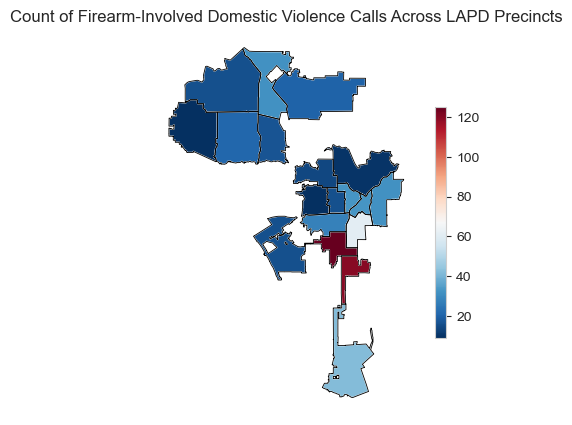

In [161]:
ax = gdf.boundary.plot(edgecolor = 'black', linewidth = 0.6, figsize=(5, 5))
gdf.plot(ax = ax, column = 'Weapon Category', legend = True, cmap = 'RdBu_r', legend_kwds = 
         {'shrink':0.6,'orientation': 'vertical'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Count of Firearm-Involved Domestic Violence Calls Across LAPD Precincts', ha = 'center')
plt.show()

In [162]:
print(firearms.sort_values(by = 'Weapon Category', ascending = False).head())
print(firearms.sort_values(by = 'Weapon Category', ascending = False).tail())

      AREA NAME  Weapon Category
0   77TH STREET              125
14    SOUTHEAST              120
9        NEWTON               61
4        HARBOR               42
1       CENTRAL               33
      AREA NAME  Weapon Category
10    NORTHEAST               10
16      TOPANGA                9
20     WILSHIRE                9
18      WEST LA                7
8   N HOLLYWOOD                6


### How Does This Address the Research Question?
**What is the frequency of domestic violence incidents involving firearms in different areas or neighborhoods? Analyze the occurrence of firearm-related domestic violence incidents in each area to identify high-crime zones.**

From the map, it is clear where there is a high frequency of domestic violence incidents.

- Red indicates higher frequency
- Dark blue indicates lower frequency.
- Close to white indicates in the middle.

This map effectively highlights the concentration of firearm-related domestic violence incidents in a specific locality, enabling clear identification of the respective area.
**Based on these data points, the following observations can be made:**

**Top Three:**

- 77th Street: 125 incidents
- Southeast: 120 incidents
- Newton: 61 incidents

**Bottom Three:**

- N Hollywood: 6 incidents
- West LA: 7 incidents
- Wilshire: 9 incidents
    
Population will be factored into the subsequent series of code. The upcoming code segments will account for population data to provide a more comprehensive analysis of the situation.

## Taking Population into Consideration
- Source: LAPD Online

In [163]:
# Data for the DataFrame
la_division_population = {
    'AREA NAME': ['77TH STREET', 'CENTRAL', 'DEVONSHIRE', 'FOOTHILL', 'HARBOR', 'HOLLENBECK', 
                  'HOLLYWOOD', 'MISSION', 'N HOLLYWOOD', 'NEWTON', 'NORTHEAST', 'OLYMPIC', 'PACIFIC', 
                  'RAMPART', 'SOUTHEAST', 'SOUTHWEST', 'TOPANGA', 'VAN NUYS', 'WEST LA', 'WEST VALLEY', 'WILSHIRE'],
    'POPULATION': [175000, 40000, 219136, 182214, 171000, 200000, 300000, 225849, 220000, 150000, 250000, 
                   200000, 200000, 164961, 150000, 165000, 179263, 325000, 228000, 196840, 251000]
}

# Create the DataFrame
la_division_population_df = pd.DataFrame(la_division_population)

# Display the DataFrame
la_division_population_df.head()

,AREA NAME,POPULATION
0,77TH STREET,175000
1,CENTRAL,40000
2,DEVONSHIRE,219136
3,FOOTHILL,182214
4,HARBOR,171000


In [164]:
# Assuming you have two DataFrames named 'firearms' and 'la_division_population'

# Perform an inner join on the 'AREA NAME' column
firearms_pop = pd.merge(left=firearms, 
                        right=la_division_population_df, 
                        on='AREA NAME', 
                        how='inner')
# Renaming column from Weapon Category to FIREARM COUNT
firearms_pop = firearms_pop.rename(columns = {'Weapon Category': 'FIREARM COUNT'})


# Measure of firearm incidents that accounts for population differences among areas
firearms_pop['Firearm Incident Rate'] = firearms_pop['FIREARM COUNT'] / firearms_pop['POPULATION'] * 100000


# Display the merged DataFrame
firearms_pop.head(5)

,AREA NAME,FIREARM COUNT,POPULATION,Firearm Incident Rate
0,77TH STREET,125,175000,71.428571
1,CENTRAL,33,40000,82.500000
2,DEVONSHIRE,16,219136,7.301402
3,FOOTHILL,20,182214,10.976105
4,HARBOR,42,171000,24.561404


In [165]:
# Read the shapefile into a GeoDataFrame
shapefile_path = 'LAPD_Divisions.shp'
gdf = gpd.read_file(shapefile_path)
gdf = pd.merge(
    left = gdf,
    right = firearms_pop,
    left_on = 'APREC', 
    right_on = 'AREA NAME',
    how = 'left'
)
gdf = gdf.dropna()

/Users/bhawanjot/anaconda3/lib/python3.10/site-packages/geopandas/plotting.py:48: ShapelyDeprecationWarning:

The 'type' attribute is deprecated, and will be removed in the future. You can use the 'geom_type' attribute instead.



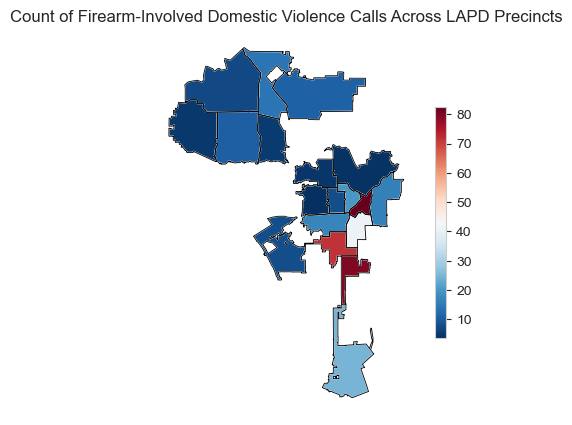

In [167]:
ax = gdf.boundary.plot(edgecolor = 'black', linewidth = 0.6, figsize=(5, 5))
gdf.plot(ax = ax, column = 'Firearm Incident Rate', legend = True, cmap = 'RdBu_r', legend_kwds = 
         {'shrink':0.6,'orientation': 'vertical'})
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

for edge in ['right', 'bottom', 'top', 'left']:
    ax.spines[edge].set_visible(False)
ax.set_title('Count of Firearm-Involved Domestic Violence Calls Across LAPD Precincts', ha = 'center')
plt.show()

In [168]:
print(firearms_pop.sort_values(by = 'Firearm Incident Rate', ascending = False)
      [['AREA NAME','Firearm Incident Rate']].head(3))

print(firearms_pop.sort_values(by = 'Firearm Incident Rate', ascending = False)
      [['AREA NAME','Firearm Incident Rate']].tail(3))

      AREA NAME  Firearm Incident Rate
1       CENTRAL              82.500000
14    SOUTHEAST              80.000000
0   77TH STREET              71.428571
      AREA NAME  Firearm Incident Rate
20     WILSHIRE               3.585657
18      WEST LA               3.070175
8   N HOLLYWOOD               2.727273


### How Does This Address the Research Question? (With Population)

**What is the frequency of domestic violence incidents involving firearms in different areas or neighborhoods? Analyze the occurrence of firearm-related domestic violence incidents in each area to identify high-crime zones.**

From the map, it is clear where there is a high frequency of domestic violence incidents.

- Red indicates higher frequency
- Dark blue indicates lower frequency.
- Close to white indicates in the middle.

This map effectively highlights the concentration of firearm-related domestic violence incidents in a specific locality, enabling clear identification of the respective area.
**Based on these data points, the following observations can be made:**

**Top Three:**

- Central: 82.5 incidents per 100,000
- Southeast: 80 incidents per 100,000
- 77th Street: 71.4 incidents per 100,000

**Bottom Three:**

- N Hollywood: 2.7 incidents per 100,000
- West LA: 3.1 incidents per 100,000
- Wilshire: 3.6 incidents per 100,000
    
Taking population into consideration, the top three locations changed. Central division had the most incidents per 100,000. 77th street fell to number 3 at 71.4 incidents per 100,000. The bottom three remained the same.

This adjustment highlights the importance of population data in understanding the relative impact of firearm-related domestic violence incidents in different areas.

In [169]:
import geopandas as gpd
import pandas as pd
import plotly.express as px

# Assuming you have already read the GeoJSON file into the 'json' GeoDataFrame
geojson_file_path = 'LAPD_Divisions.geojson'
json = gpd.read_file(geojson_file_path)

# Merge json and firearms_pop DataFrames on the appropriate column (e.g., 'APREC' and 'AREA NAME')
json = pd.merge(left=json, right=firearms_pop, left_on='APREC', right_on='AREA NAME', how='inner')

fig = px.choropleth(json, geojson=json, color="Firearm Incident Rate",
                    locations="AREA NAME", featureidkey="properties.APREC",
                    projection="mercator", color_continuous_scale="YlOrRd",
                    labels={'Firearm Incident Rate': 'Firearm Incident Rate per 100,000'})
fig.update_layout(title_text="Firearm Incident Rate in LAPD Divisions")             
fig.update_geos(fitbounds="locations", visible=False)
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})
fig.show()

### Use of Interactive Choropleth Map

This visualization offers a clearer depiction of the distribution of incident rates per 100,000 across the various LAPD areas in Los Angeles. By simply clicking on the map, you can instantly identify the specific area and view its corresponding incident rate. This interactive approach provides a more effective and user-friendly representation compared to the previous visualizations.